# PCA (Principal Component Analysis)
主成分分析

In [37]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [38]:
np.random.seed(1000)

顯示手寫辨識影像:


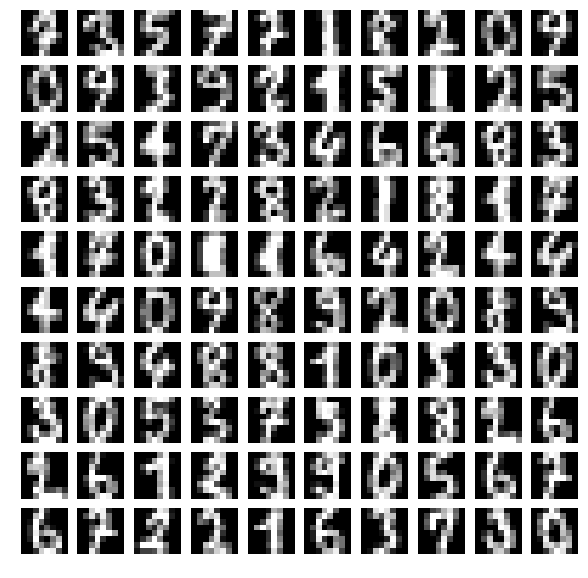

投影後變異數比:
[0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315987 0.03661373 0.03353248 0.03078806 0.02372341 0.02272697
 0.01821863 0.01773855 0.01467101 0.01409716 0.01318589 0.01248138
 0.01017718 0.00905617 0.00889538 0.00797123 0.00767493 0.00722904
 0.00695889 0.00596081 0.00575615 0.00515158 0.0048954  0.00428887
 0.00373604 0.00353274 0.00336681 0.00328023 0.00308318 0.00293778]
投影後變異數:
[2.75289397e-03 2.51776620e-03 2.18052194e-03 1.55479239e-03
 1.06902215e-03 9.09012301e-04 7.97916788e-04 6.76895143e-04
 6.19930723e-04 5.69193363e-04 4.38585793e-04 4.20164088e-04
 3.36816427e-04 3.27940893e-04 2.71229869e-04 2.60620744e-04
 2.43773778e-04 2.30749100e-04 1.88150299e-04 1.67425748e-04
 1.64453152e-04 1.47367901e-04 1.41890082e-04 1.33646574e-04
 1.28652233e-04 1.10200331e-04 1.06416588e-04 9.52395892e-05
 9.05034754e-05 7.92904024e-05 6.90699646e-05 6.53114166e-05
 6.22438293e-05 6.06432060e-05 5.70002469e-05 5.43120366e-05]


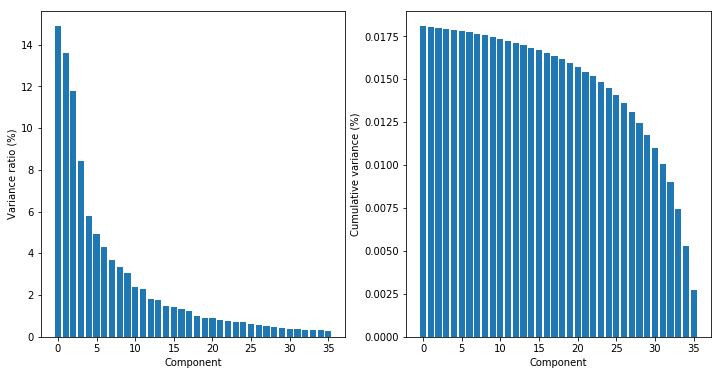

將手寫影像反投影回來顯示:


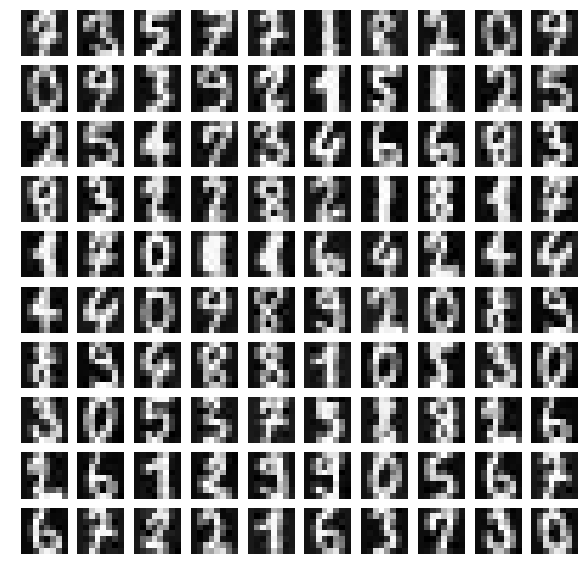

In [39]:
if __name__ == '__main__':
    # MNIST手寫辨識數字
    print('顯示手寫辨識影像:')
    digits = load_digits()
    selection = np.random.randint(0, 1500, size=100)
    fig, ax = plt.subplots(10, 10, figsize=(10, 10))
    samples = [digits.data[x].reshape((8, 8)) for x in selection]
    for i in range(10):
        for j in range(10):
            ax[i, j].set_axis_off()
            ax[i, j].imshow(samples[(i * 8) + j], cmap='gray')
    plt.show()
    pca = PCA(n_components=36, whiten=True)
    X_pca = pca.fit_transform(digits.data / 255)
    print('投影後變異數比:')
    print(pca.explained_variance_ratio_)
    print('投影後變異數:')
    print(pca.explained_variance_)
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].set_xlabel('Component')
    ax[0].set_ylabel('Variance ratio (%)')
    ax[0].bar(np.arange(36), pca.explained_variance_ratio_ * 100.0)
    ax[1].set_xlabel('Component')
    ax[1].set_ylabel('Cumulative variance (%)')
    ax[1].bar(np.arange(36), np.cumsum(pca.explained_variance_)[::-1])
    plt.show()
    fig, ax = plt.subplots(10, 10, figsize=(10, 10))

    samples = [pca.inverse_transform(X_pca[x]).reshape((8, 8)) for x in selection]#將手寫影像反投影
    print('將手寫影像反投影回來顯示:')

    for i in range(10):
        for j in range(10):
            ax[i, j].set_axis_off()
            ax[i, j].imshow(samples[(i * 8) + j], cmap='gray')

    plt.show()

